In [208]:
library(car)
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.3"


In [1]:
companies <- read.csv(file = 'companies.csv')
names(companies)[1] <- 'company'
contrasts(companies$quarter) = contr.sum(4)
contrasts(companies$location) = contr.sum(3)
attach(companies)

In [2]:
companies


company,value,quarter,location
<fct>,<dbl>,<fct>,<fct>
Tencent Music,1100000000,4th Quarter,China
MOGU,67000000,4th Quarter,China
Weidai,45000000,4th Quarter,China
Niu.com,63000000,4th Quarter,China
SolarWinds,375000000,4th Quarter,Other
Anaplan,263500000,4th Quarter,Bay_Area
Elastic,252000000,4th Quarter,Bay_Area
UpWork,187000000,4th Quarter,Bay_Area
CooTek,52200000,3rd Quarter,China


In [238]:
companies2 <- companies[
#     (companies$company!='Spotify') &
#                         (companies$company!='One Stop Systems (OSS)') &
                        (companies$company!='Senmiao Technology') &
                        (companies$company!='HyreCar')
                        ,]
detach(companies)
attach(companies2)

In [225]:
interaction <- quarter*location

Warning message in Ops.factor(quarter, location):
"'*' not meaningful for factors"


In [216]:
leaps(cbind(quarter, location, quarter*location, wt=wt),log(value),nbest=1)

,1,2
1,TRUE,FALSE
1,FALSE,TRUE
2,TRUE,TRUE


In [237]:
companies[43,]

,company,value,quarter,location
,<fct>,<dbl>,<fct>,<fct>
43,Senmiao Technology,1.2e+07,1st Quarter,China


In [200]:
companya <- aov(log(value) ~ quarter + location)
companyb <- aov(log(value) ~ quarter + location + quarter*location)

In [196]:
table(quarter,location)

             location
quarter       Bay_Area China Other
  1st Quarter        2     3     4
  2nd Quarter        3     2     9
  3rd Quarter        4     5     5
  4th Quarter        3     4     1

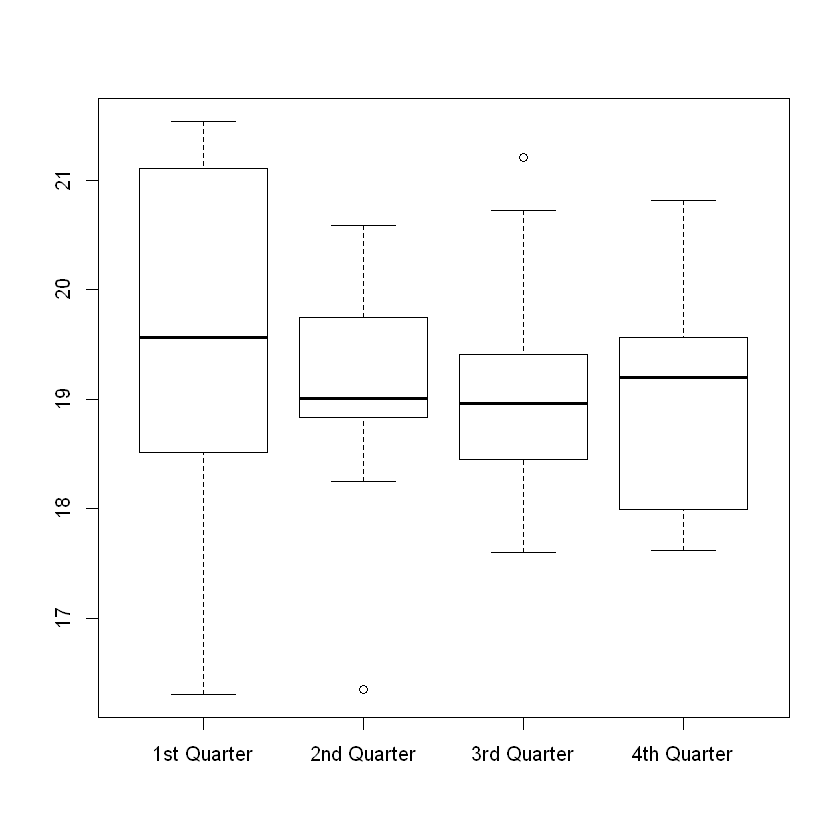

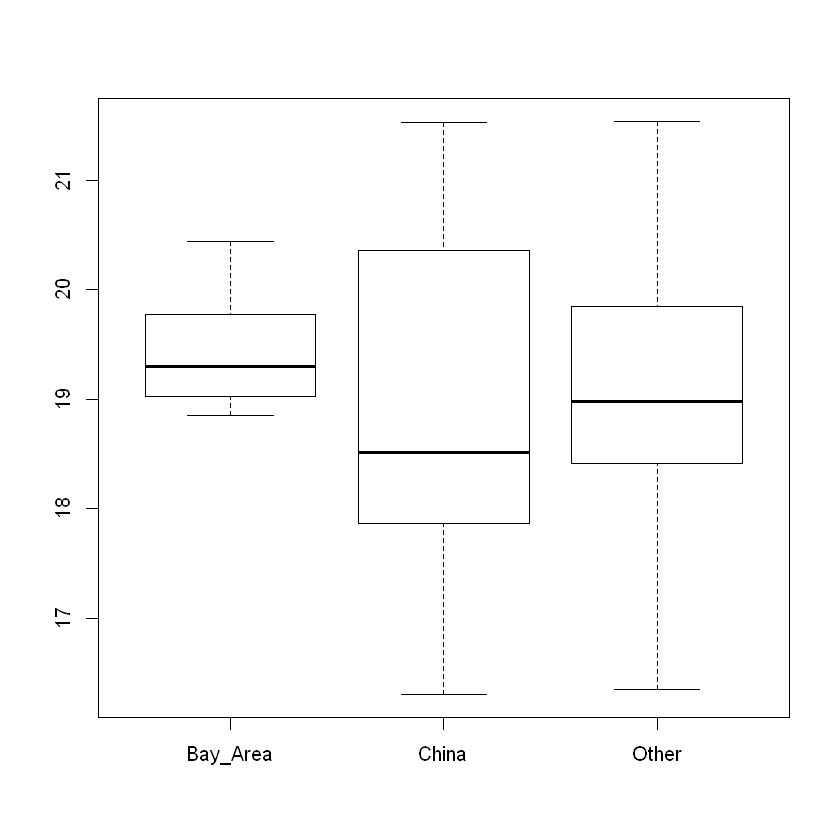

In [156]:
boxplot(split(log(value),quarter))
boxplot(split(log(value),location))

In [148]:
Anova(companyb)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
quarter,7.2196935,3,2.0984072,0.1199636
location,0.5728986,2,0.2497699,0.7804845
quarter:location,2.6608613,6,0.3866903,0.8820449
Residuals,36.6992936,32,NA,NA


In [207]:
summary(companya)

            Df Sum Sq Mean Sq F value Pr(>F)
quarter      3   3.34  1.1119   0.873  0.463
location     2   0.60  0.3015   0.237  0.790
Residuals   39  49.65  1.2731               

In [206]:
company.aov = aov(logvalues ~ companies2$quarter + companies2$location, weight=wt)
TukeyHSD(company.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = logvalues ~ companies2$quarter + companies2$location, weight = wt)

$`companies2$quarter`
                                 diff        lwr       upr     p adj
2nd Quarter-1st Quarter -0.3407076822 -0.9609746 0.2795593 0.4582414
3rd Quarter-1st Quarter -0.3703346770 -0.9906016 0.2499323 0.3853182
4th Quarter-1st Quarter -0.3696055078 -1.0667254 0.3275144 0.4888010
3rd Quarter-2nd Quarter -0.0296269948 -0.4796159 0.4203620 0.9979628
4th Quarter-2nd Quarter -0.0288978256 -0.5800195 0.5222238 0.9989661
4th Quarter-3rd Quarter  0.0007291692 -0.5503925 0.5518508 1.0000000

$`companies2$location`
                      diff        lwr       upr     p adj
China-Bay_Area -0.04368448 -0.4686301 0.3812611 0.9656591
Other-Bay_Area -0.06278639 -0.4877320 0.3621592 0.9304412
Other-China    -0.01910190 -0.4273765 0.3891726 0.9927811


In [192]:
company.tukey = glht(companya, linfct=mcp(quarter="Tukey"))

In [193]:
summary(company.tukey)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = log(value) ~ quarter + location)

Linear Hypotheses:
                               Estimate Std. Error t value Pr(>|t|)
2nd Quarter - 1st Quarter == 0  -0.5204     0.4891  -1.064    0.711
3rd Quarter - 1st Quarter == 0  -0.6823     0.4832  -1.412    0.498
4th Quarter - 1st Quarter == 0  -0.8375     0.5606  -1.494    0.449
3rd Quarter - 2nd Quarter == 0  -0.1620     0.4401  -0.368    0.983
4th Quarter - 2nd Quarter == 0  -0.3171     0.5362  -0.591    0.934
4th Quarter - 3rd Quarter == 0  -0.1551     0.5073  -0.306    0.990
(Adjusted p values reported -- single-step method)


Warning message:
"not plotting observations with leverage one:
  5"


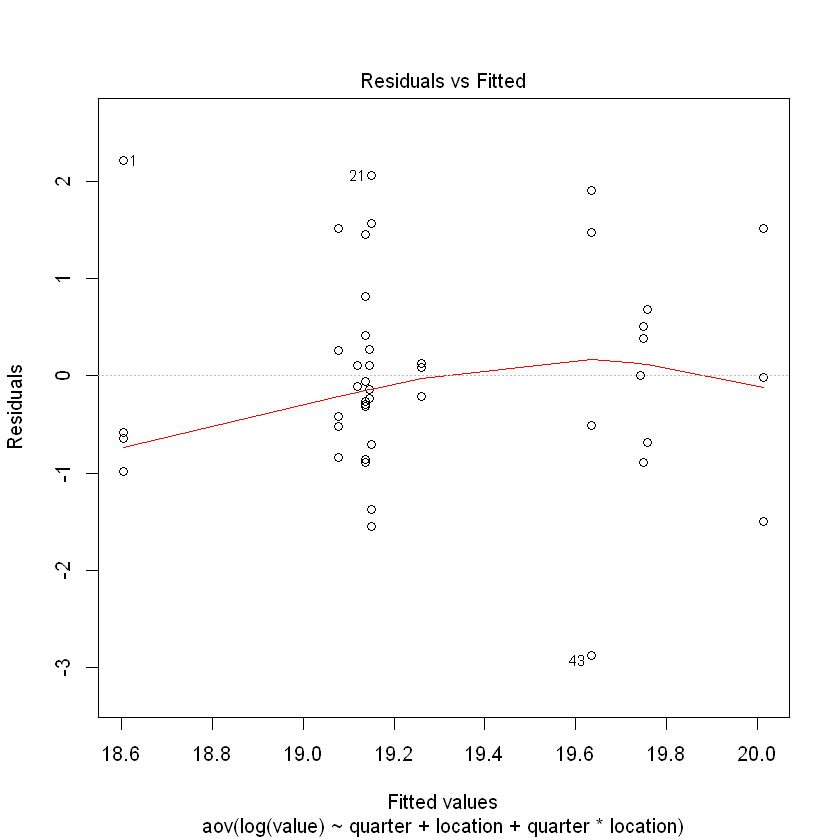

Warning message:
"not plotting observations with leverage one:
  5"


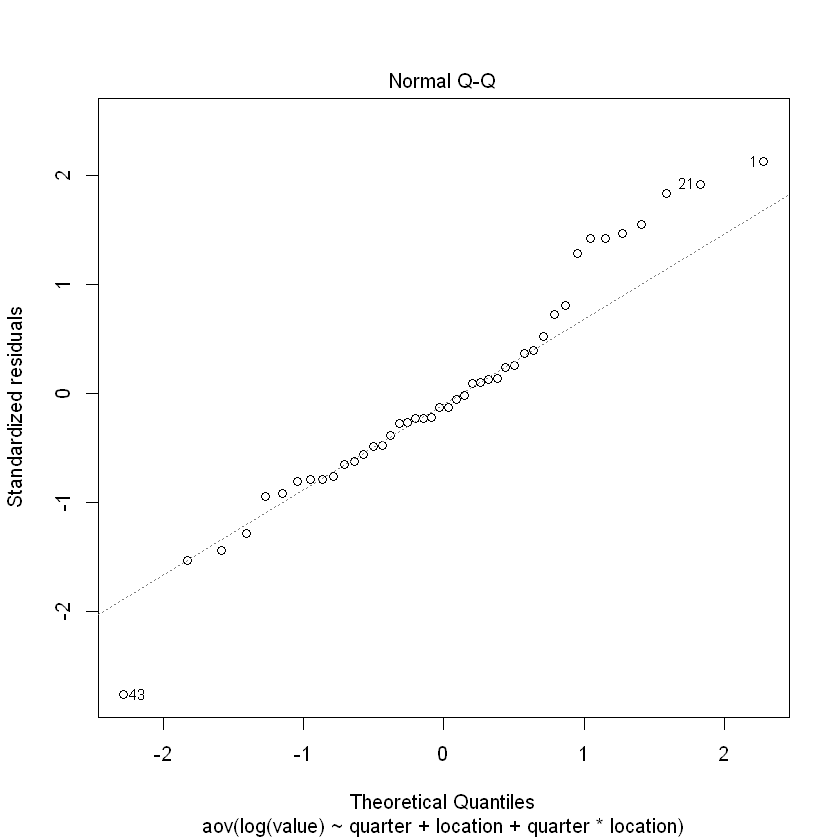

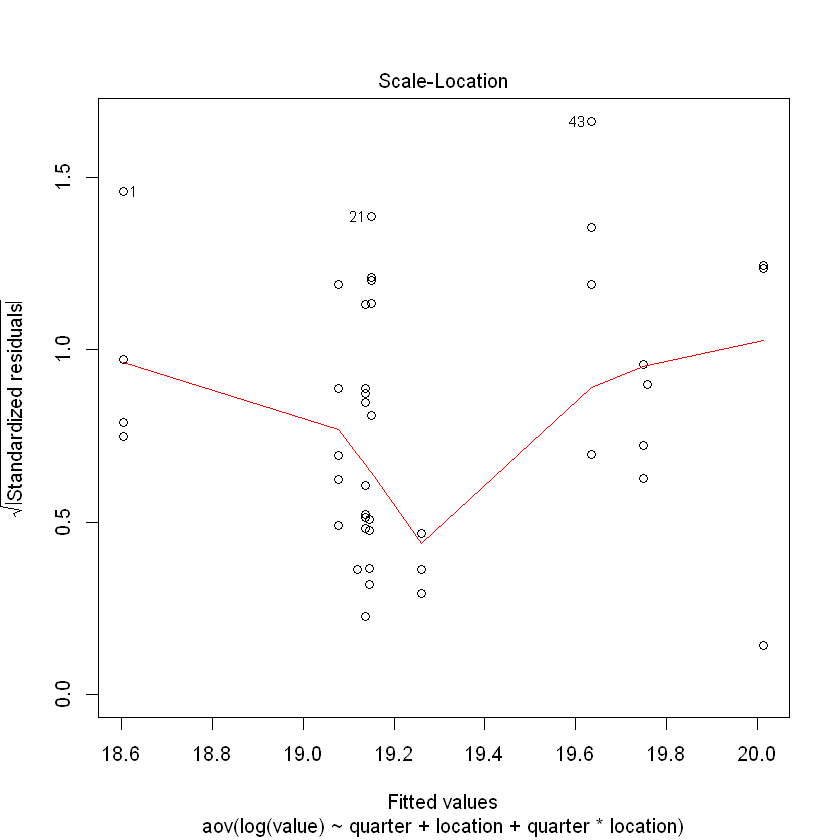

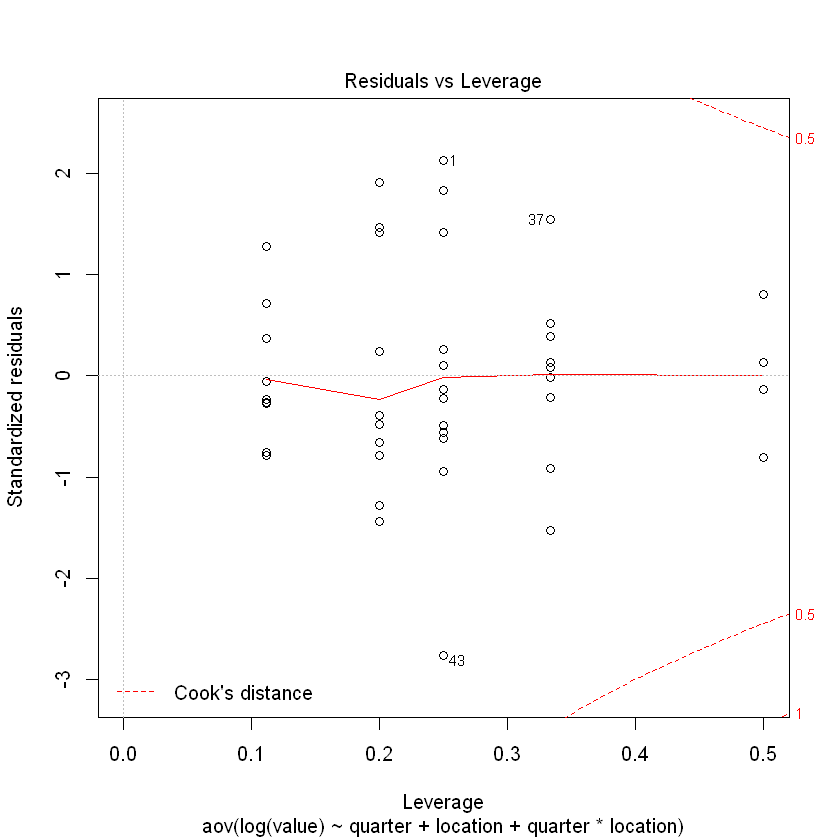

In [239]:
plot(companyb)

In [150]:
std.resd <- rstandard(companyb)

In [151]:
levened <- aov(abs(std.resd) ~ quarter + location + quarter*location)

In [152]:
levened <- aov(abs(std.resd) ~ quarter + location + quarter*location)
Anova(levened)

Note: model has aliased coefficients
      sums of squares computed by model comparison



,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
quarter,1.170783,3,1.486781,0.236750891
location,3.044665,2,5.799647,0.007091339
quarter:location,3.214419,5,2.449202,0.054784826
Residuals,8.399586,32,NA,NA


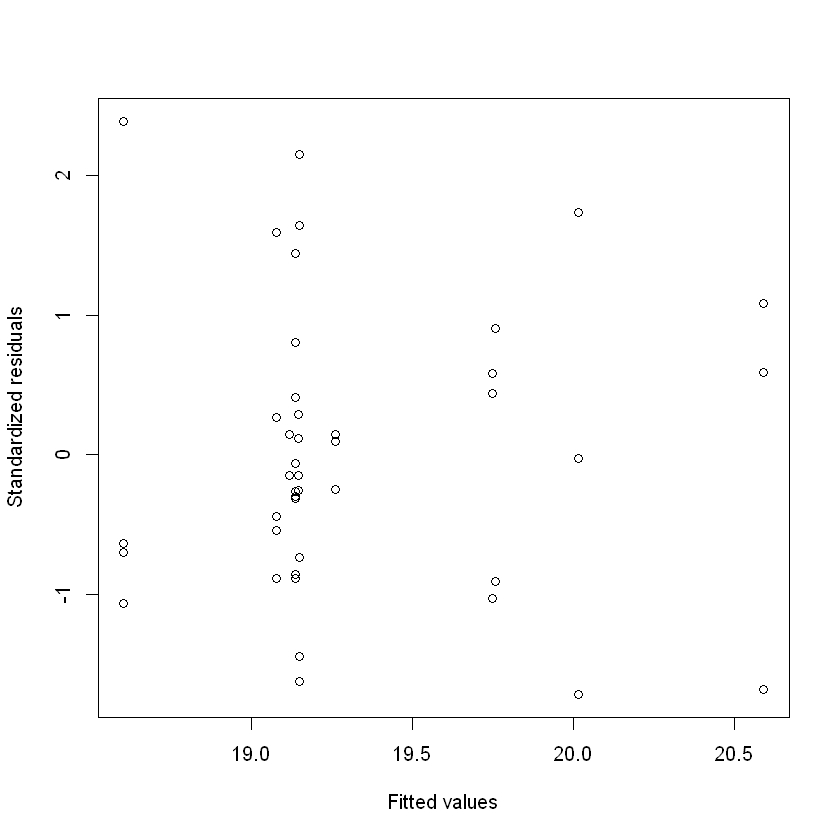

,std.resd,hatd,cooksd
1,2.38687506,0.2500000,1.582548e-01
2,-0.63044293,0.2500000,1.104051e-02
3,-1.05961500,0.2500000,3.118844e-02
4,-0.69681712,0.2500000,1.348761e-02
5,NaN,1.0000000,NaN
6,0.14774731,0.3333333,9.095528e-04
7,0.09671291,0.3333333,3.897245e-04
8,-0.24446022,0.3333333,2.490033e-03
9,-1.44046911,0.2000000,4.322815e-02
10,-0.14896081,0.2500000,6.163701e-04


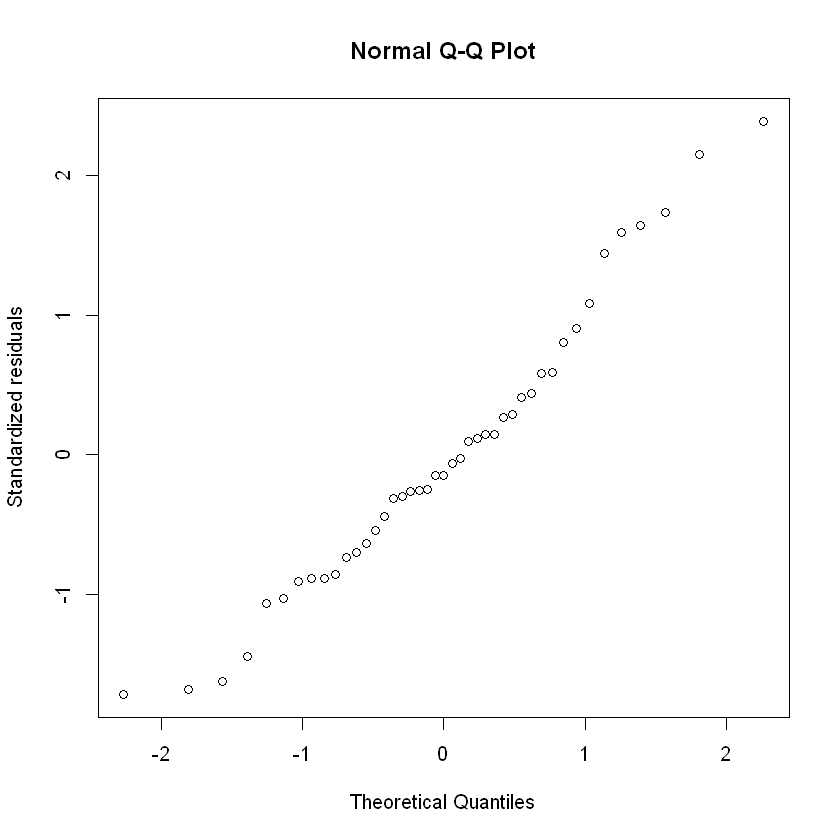

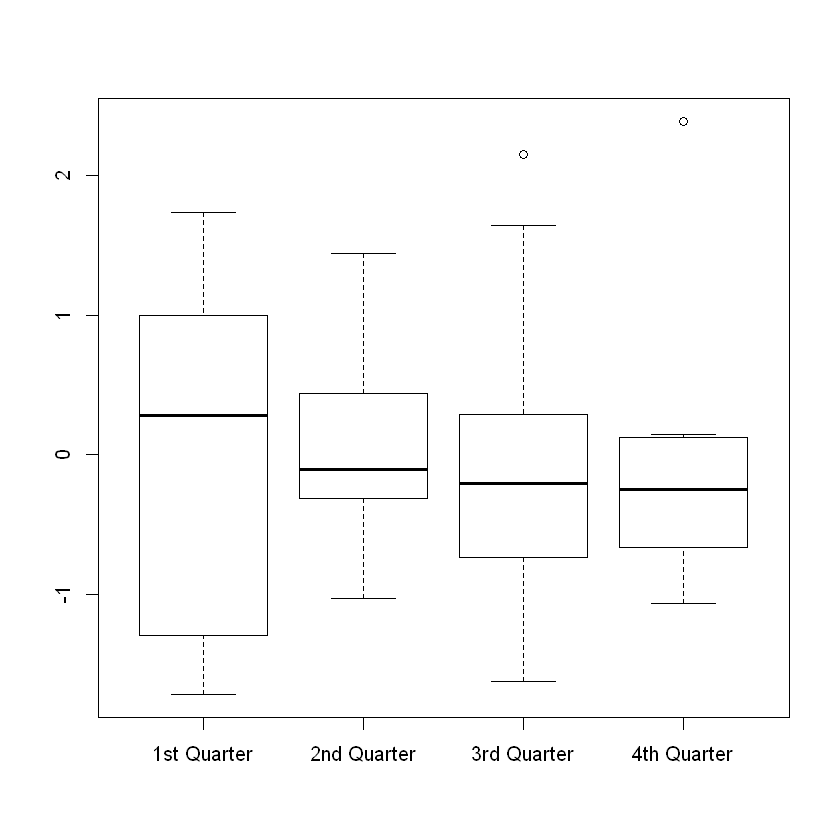

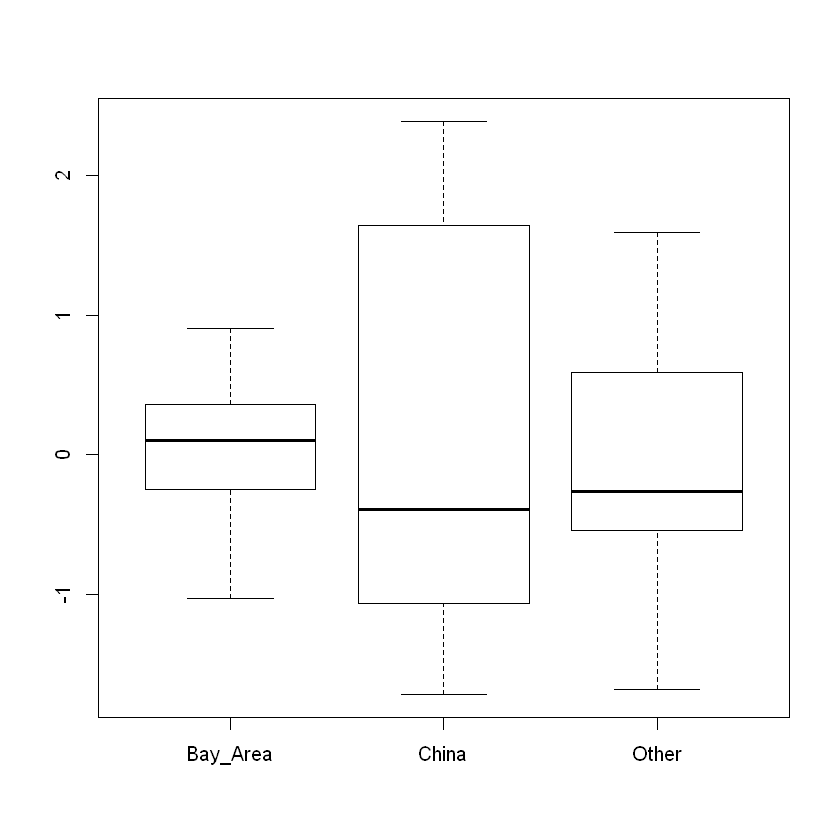

In [146]:
std.resd <- rstandard(companyb)
hatd <- hatvalues(companyb)
cooksd <- cooks.distance(companyb)
plot(fitted(companyb),std.resd,xlab="Fitted values",ylab="Standardized residuals")
qqnorm(std.resd, ylab="Standardized residuals")
cbind(std.resd,hatd,cooksd)
boxplot(split(std.resd,quarter))
boxplot(split(std.resd,location))

In [201]:
groupsd <- sapply(split(std.resd,list(companies2$quarter,companies2$location)),sd)
wt<-rep(NA,dim(companies2)[1])
wt[(companies2$quarter=="1st Quarter")&(companies2$location=="Bay_Area")] <- 1 / groupsd["1st Quarter.Bay_Area"]^2
wt[(companies2$quarter=="1st Quarter")&(companies2$location=="China")] <- 1 / groupsd["1st Quarter.China"]^2
wt[(companies2$quarter=="1st Quarter")&(companies2$location=="Other")] <- 1 / groupsd["1st Quarter.Other"]^2
wt[(companies2$quarter=="2nd Quarter")&(companies2$location=="Bay_Area")] <- 1 / groupsd["2nd Quarter.Bay_Area"]^2
wt[(companies2$quarter=="2nd Quarter")&(companies2$location=="China")] <- 1 / groupsd["2nd Quarter.China"]^2
wt[(companies2$quarter=="2nd Quarter")&(companies2$location=="Other")] <- 1 / groupsd["2nd Quarter.Other"]^2
wt[(companies2$quarter=="3rd Quarter")&(companies2$location=="Bay_Area")] <- 1 / groupsd["3rd Quarter.Bay_Area"]^2
wt[(companies2$quarter=="3rd Quarter")&(companies2$location=="China")] <- 1 / groupsd["3rd Quarter.China"]^2
wt[(companies2$quarter=="3rd Quarter")&(companies2$location=="Other")] <- 1 / groupsd["3rd Quarter.Other"]^2
wt[(companies2$quarter=="4th Quarter")&(companies2$location=="Bay_Area")] <- 1 / groupsd["4th Quarter.Bay_Area"]^2
wt[(companies2$quarter=="4th Quarter")&(companies2$location=="China")] <- 1 / groupsd["4th Quarter.China"]^2
wt[(companies2$quarter=="4th Quarter")&(companies2$location=="Other")] <- 1 / groupsd["4th Quarter.Other"]^2

Warning message in split.default(std.resd, list(companies2$quarter, companies2$location)):
"data length is not a multiple of split variable"


In [202]:
logvalues <- log10(companies2$value)

In [212]:
companye <- aov(logvalues ~ companies2$quarter + companies2$location + companies2$quarter*companies2$location, weight=wt)
Anova(companye)
summary(lm(logvalues ~ companies2$quarter + companies2$location + companies2$quarter*companies2$location, weight=wt))

Note: model has aliased coefficients
      sums of squares computed by model comparison



,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
companies2$quarter,1.70681550,3,1.19805664,0.3273148
companies2$location,0.03425613,2,0.03606786,0.9646166
companies2$quarter:companies2$location,0.27970652,4,0.14724977,0.9627978
Residuals,14.24653429,30,NA,NA



Call:
lm(formula = logvalues ~ companies2$quarter + companies2$location + 
    companies2$quarter * companies2$location, weights = wt)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-2.15816 -0.19433 -0.07154  0.16922  2.18653 

Coefficients: (2 not defined because of singularities)
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               8.33734    0.27883  29.901   <2e-16
companies2$quarter1                       0.34422    0.19832   1.736   0.0929
companies2$quarter2                       0.05985    0.31497   0.190   0.8506
companies2$quarter3                      -0.03139    0.28798  -0.109   0.9139
companies2$location1                      0.12208    0.29060   0.420   0.6774
companies2$location2                      0.01094    0.28194   0.039   0.9693
companies2$quarter1:companies2$location1 -0.22273    0.34595  -0.644   0.5246
companies2$quarter2:companies2$location1  0.05755    0.32543   0.177   

In [213]:
drop1(companye, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,14.24653,-21.29463,NA,NA
companies2$quarter:companies2$location,4,0.2797065,14.52624,-28.51691,0.1472498,0.9627978


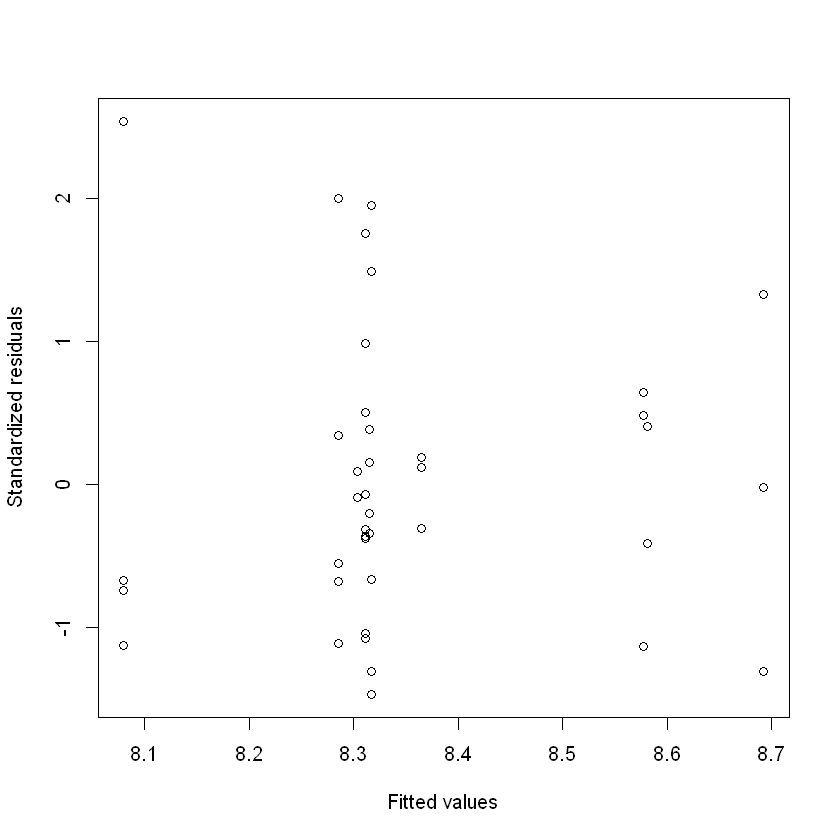

,std.resd,hatd,cooksd
1,2.54023855,0.2500000,2.150937e-01
2,-0.67095068,0.2500000,1.500583e-02
3,-1.12769827,0.2500000,4.239011e-02
4,-0.74158960,0.2500000,1.833184e-02
6,0.18629032,0.3333333,1.735204e-03
7,0.12194252,0.3333333,7.434989e-04
8,-0.30823285,0.3333333,4.750374e-03
9,-1.30747722,0.2000000,4.273742e-02
10,-0.19958727,0.2500000,1.327836e-03
11,-0.66712212,0.2000000,1.112630e-02


Warning message in split.default(abs(std.resd), quarter):
"data length is not a multiple of split variable"


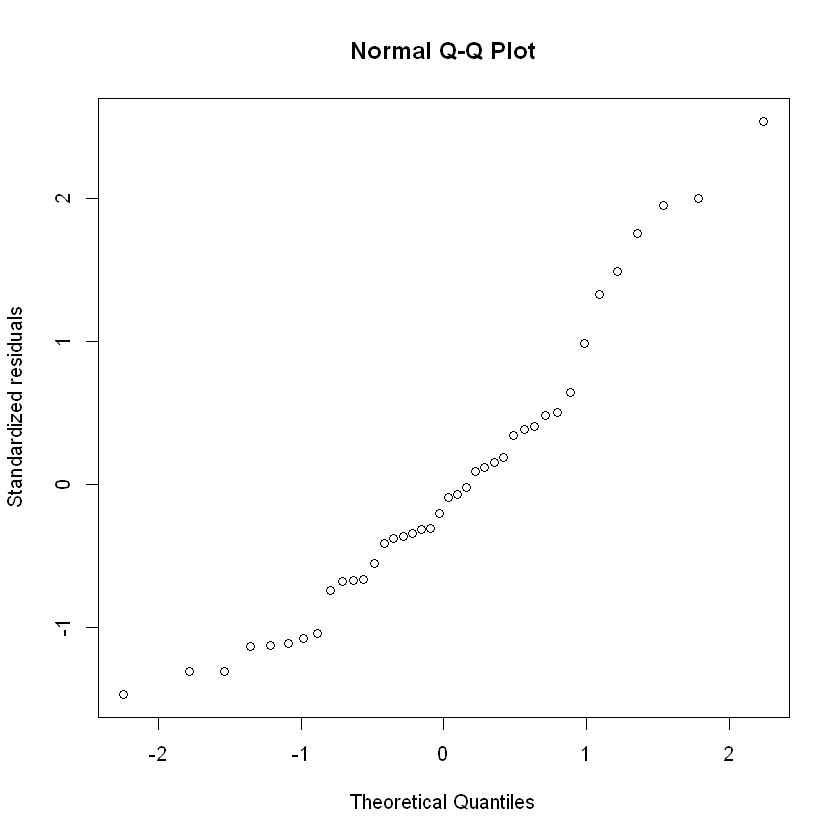

Warning message in split.default(abs(std.resd), location):
"data length is not a multiple of split variable"


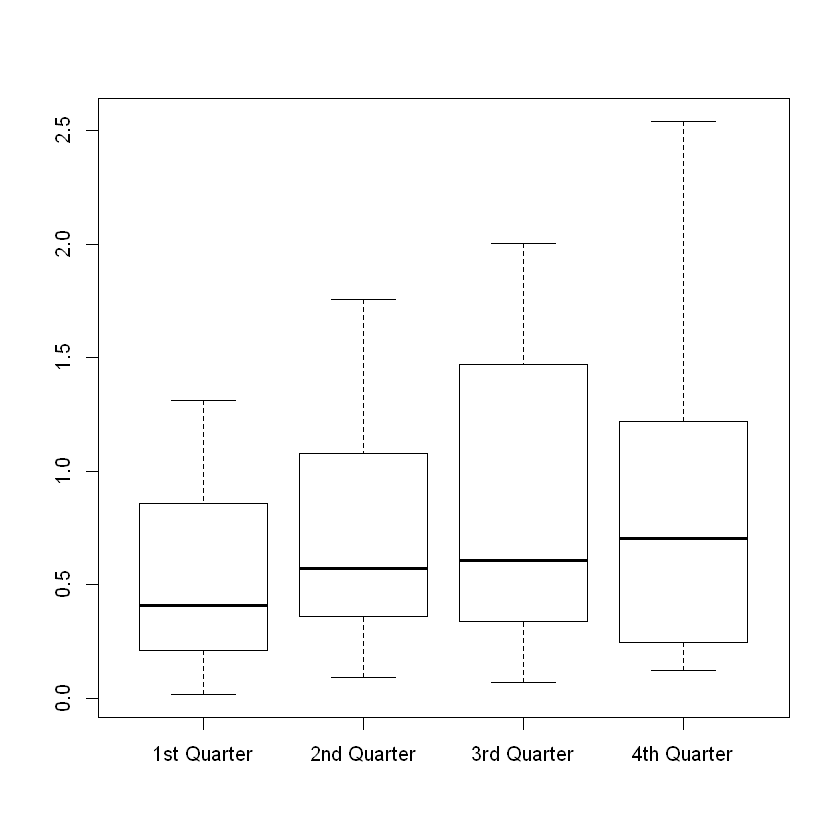

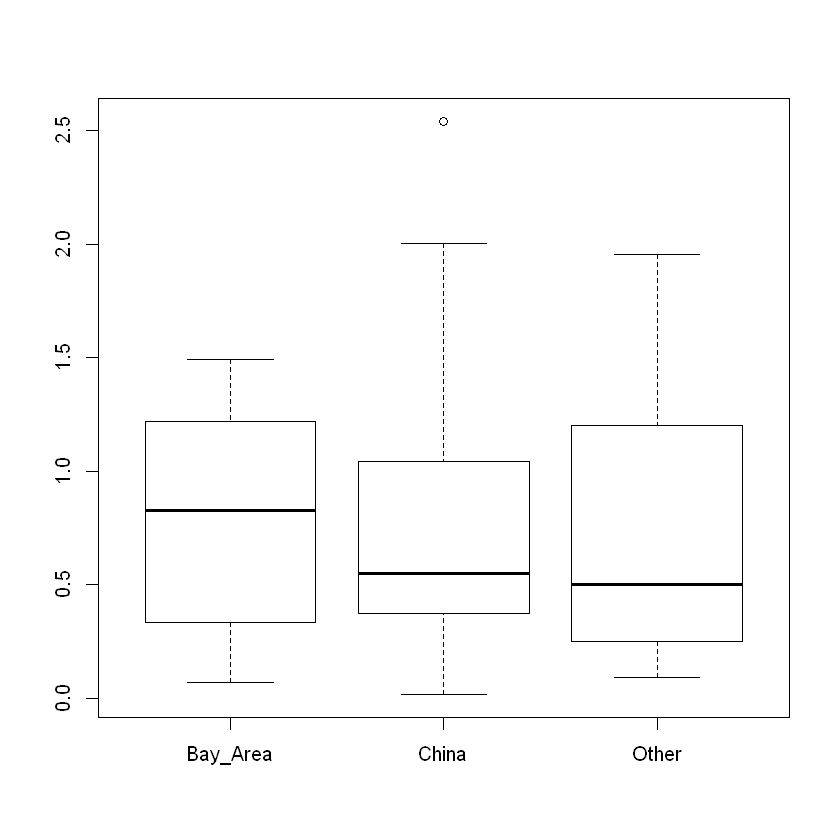

In [189]:
std.resd <- rstandard(companye)
hatd <- hatvalues(companye)
cooksd <- cooks.distance(companye)
plot(fitted(companye),std.resd,xlab="Fitted values",ylab="Standardized residuals")
qqnorm(std.resd, ylab="Standardized residuals")
cbind(std.resd,hatd,cooksd)
boxplot(split(abs(std.resd),quarter))
boxplot(split(abs(std.resd),location))

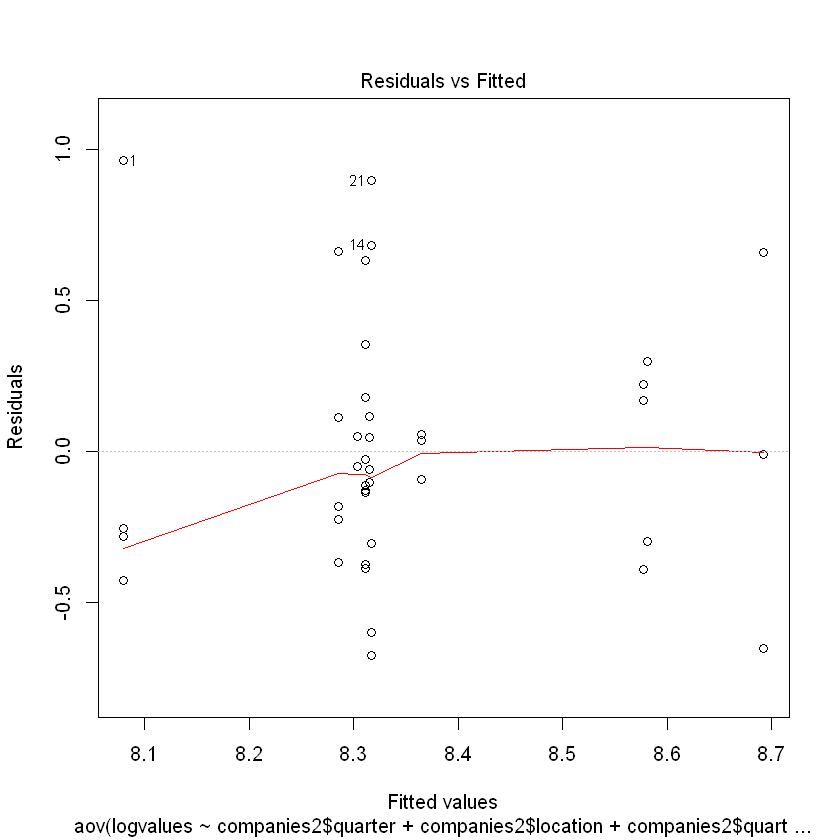

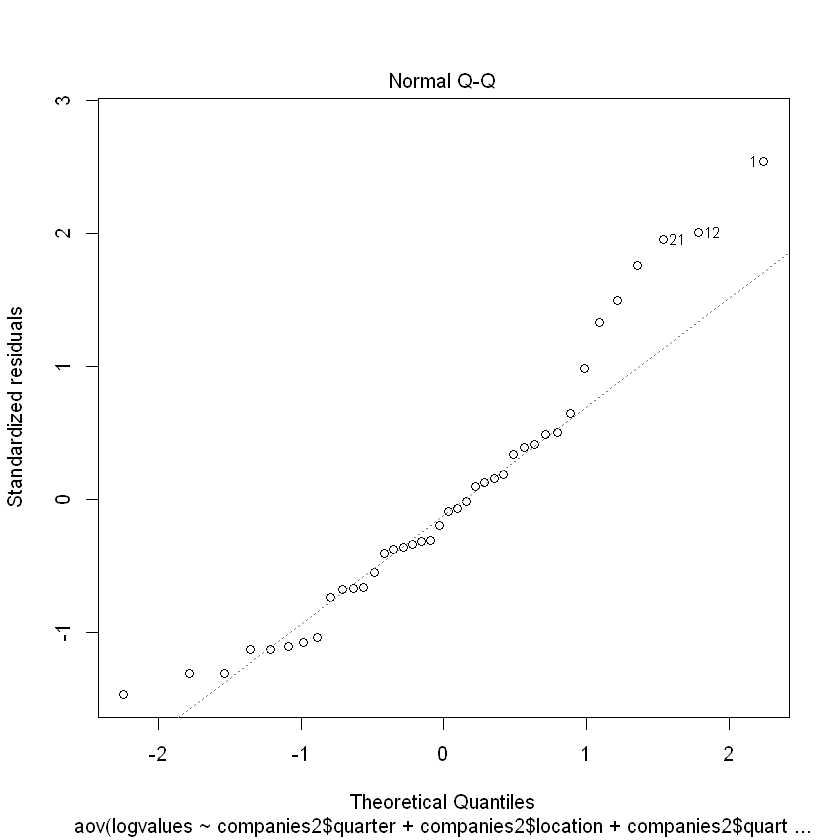

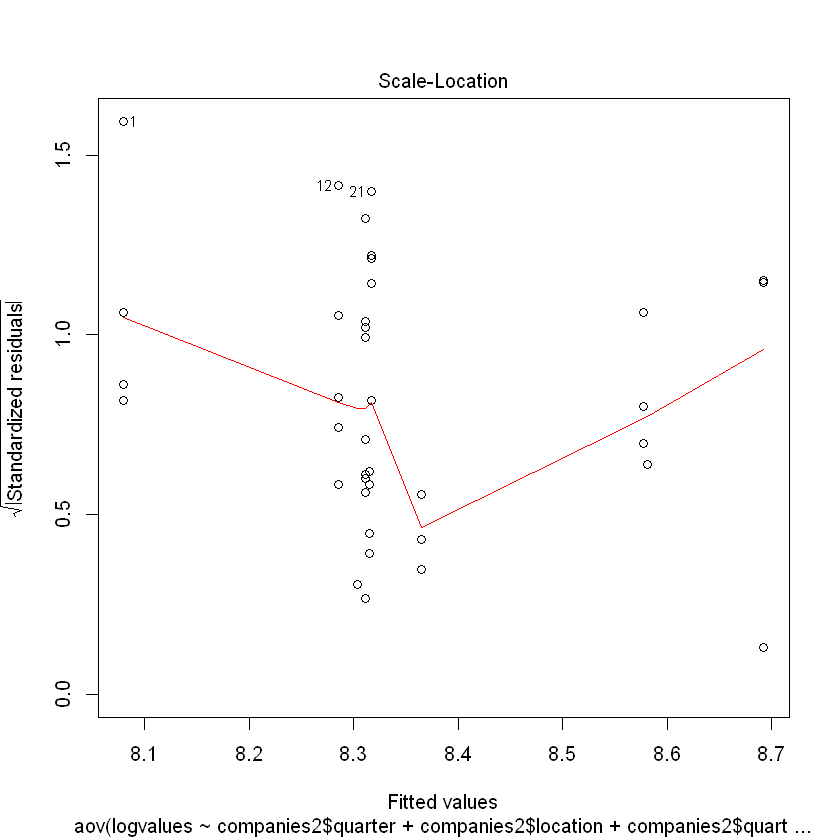

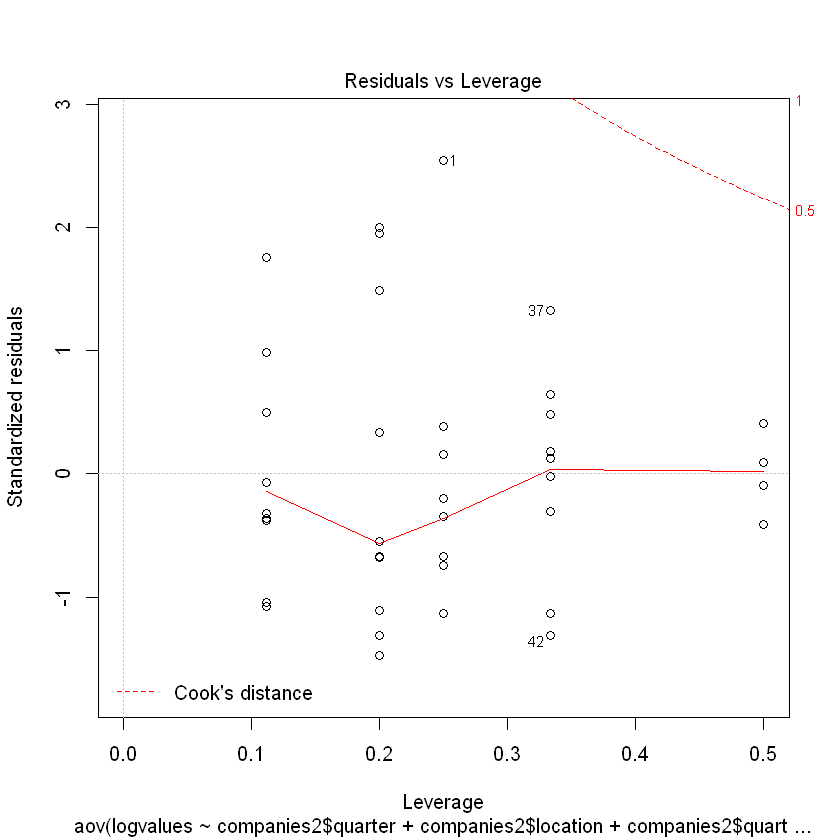

In [190]:
plot(companye)

In [173]:
levened <- aov(abs(std.resd) ~ quarter + location + quarter*location)
Anova(levened)

ERROR: Error in model.frame.default(formula = abs(std.resd) ~ quarter + location + : variable lengths differ (found for 'quarter')
